In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import warnings
warnings.filterwarnings("ignore")

In [4]:
dataset = pd.read_csv("PriceRange.csv")

In [5]:
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
X = dataset.iloc[:,0:20]
y = dataset.iloc[:,20]

In [8]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


## Feature Selection Using Univariate Feature Selection

In [9]:
bestFeatures = SelectKBest(score_func=chi2, k=10)
fit = bestFeatures.fit(X,y)

In [10]:
dfScores = pd.DataFrame(fit.scores_)  # The scores calculated of all features, storing it in as a dataframe 
dfColumns = pd.DataFrame(X.columns)   # The column names for which all scores calculated.

In [11]:
FeatureScores = pd.concat([dfColumns, dfScores], axis=1)   #Concatenating two columns for better visualization
FeatureScores.columns = ["Specifications", "FeatureScore"] #Renaming the columns for better understanding

In [12]:
FeatureScores

,Specifications,FeatureScore
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [13]:
print(FeatureScores.nlargest(10,"FeatureScore"))

   Specifications   FeatureScore
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


In [14]:
X_UFS_Features = dataset[["ram","px_height","battery_power","px_width","mobile_wt","int_memory","sc_w","talk_time","fc","sc_h"]]

In [15]:
X_UFS_Features

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8
...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,4,19,0,13
1996,2032,915,1965,1965,187,39,10,16,0,11
1997,3057,868,1911,1632,108,36,1,5,1,9
1998,869,336,1512,670,145,46,10,19,4,18


## Feature Selection using Feature Importance

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [17]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [18]:
model.feature_importances_

array([0.06082763, 0.02034468, 0.03473073, 0.01958214, 0.03304929,
       0.01777352, 0.03715495, 0.03415914, 0.03685188, 0.03377714,
       0.03345411, 0.04598317, 0.04895844, 0.38487946, 0.03441904,
       0.03508649, 0.03556595, 0.01410701, 0.01885184, 0.02044339])

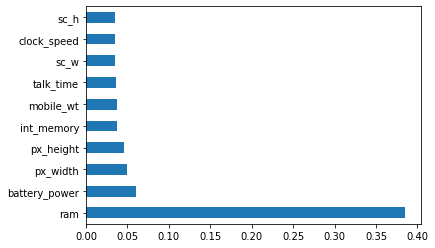

In [19]:
featureImportance = pd.Series(model.feature_importances_, index = X.columns)
featureImportance.nlargest(10).plot(kind="barh")
plt.show()

In [20]:
X_FeatureImportance = dataset[["ram","battery_power","px_width","px_height","mobile_wt","int_memory","talk_time","sc_h","m_dep","pc"]]

In [21]:
X_FeatureImportance

,ram,battery_power,px_width,px_height,mobile_wt,int_memory,talk_time,sc_h,m_dep,pc
0,2549,842,756,20,188,7,19,9,0.6,2
1,2631,1021,1988,905,136,53,7,17,0.7,6
2,2603,563,1716,1263,145,41,9,11,0.9,6
3,2769,615,1786,1216,131,10,11,16,0.8,9
4,1411,1821,1212,1208,141,44,15,8,0.6,14
...,...,...,...,...,...,...,...,...,...,...
1995,668,794,1890,1222,106,2,19,13,0.8,14
1996,2032,1965,1965,915,187,39,16,11,0.2,3
1997,3057,1911,1632,868,108,36,5,9,0.7,3
1998,869,1512,670,336,145,46,19,18,0.1,5


## Model Ceation and Prediction
From the above feature selction methods we can see that we got the top 10 highest cor-related features by using which we can make a model for predicting the price range of the phone weather it is low, medium or high.

In [22]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_UFS_Features, y, test_size=0.33, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_FeatureImportance, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train1_scaled = sc.fit_transform(X_train1)
X_test1_scaled = sc.transform(X_test1)

X_train2_scaled = sc.transform(X_train2)
X_test2_scaled = sc.transform(X_test2)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

KNN_Model1 = KNeighborsClassifier(20)
KNN_Model2 = KNeighborsClassifier(20)

Tree1 = DecisionTreeClassifier(criterion="entropy" , max_depth=4)
Tree2 = DecisionTreeClassifier(criterion="entropy" , max_depth=4)

LR_Model1 = LogisticRegression()
LR_Model2 = LogisticRegression()

In [46]:
KNN_Model1.fit(X_train1_scaled,y_train1)
KNN_Model2.fit(X_train2_scaled,y_train2)

Tree1.fit(X_train1_scaled,y_train1)
Tree2.fit(X_train2_scaled,y_train2)

LR_Model1.fit(X_train1_scaled,y_train1)
LR_Model2.fit(X_train2_scaled,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
KNN_pred1 = KNN_Model1.predict(X_test1_scaled)
KNN_pred2 = KNN_Model1.predict(X_test2_scaled)

ypred_UFS = Tree1.predict(X_test1_scaled)
ypred_FI = Tree2.predict(X_test2_scaled)

ypred1 = LR_Model1.predict(X_test1_scaled)
ypred2 = LR_Model2.predict(X_test2_scaled)

In [51]:
from sklearn.metrics import accuracy_score

print("Model Accuracy by using Decision Tree Algorithm:")
print("Accuarcy of model by selecting features from Univariate Feature Selection is :",accuracy_score(ypred_UFS,y_test1))
print("Accuarcy of model by selecting features from Feature Importance is :",accuracy_score(ypred_FI,y_test2))

print("\nModel Accuracy by using Logistic Regression:")
print("Accuarcy of model by selecting features from Univariate Feature Selection is :",accuracy_score(ypred1,y_test1))
print("Accuarcy of model by selecting features from Feature Importance is :",accuracy_score(ypred2,y_test2))

print("\nModel Accuracy by using K-Nearest Neighbors:")
print("Accuarcy of model by selecting features from Univariate Feature Selection is :",accuracy_score(KNN_pred1,y_test1))
print("Accuarcy of model by selecting features from Feature Importance is :",accuracy_score(KNN_pred2,y_test2))

Model Accuracy by using Decision Tree Algorithm:
Accuarcy of model by selecting features from Univariate Feature Selection is : 0.759090909090909
Accuarcy of model by selecting features from Feature Importance is : 0.759090909090909

Model Accuracy by using Logistic Regression:
Accuarcy of model by selecting features from Univariate Feature Selection is : 0.9696969696969697
Accuarcy of model by selecting features from Feature Importance is : 0.9727272727272728

Model Accuracy by using K-Nearest Neighbors:
Accuarcy of model by selecting features from Univariate Feature Selection is : 0.7181818181818181
Accuarcy of model by selecting features from Feature Importance is : 0.7


In [52]:
ypred1

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       3, 3, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 2, 0, 2, 2, 3, 3, 3, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 1, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 1, 3, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,